# Morphology
Summary:
- close = dilation + erosion
- when cross SE used for dilation followed by erosion, subdue fillings can be found on the closed coners (close)
- when box SE used for dilation followed by erosion, the original image is restored (not for O-shape).
- when non-symmetric SE used, the shape gets altered!

In [1]:
from importlib import reload
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipcv import cvlib
import utility.notebook_helper as nb

reload(nb)

<module 'utility.notebook_helper' from '/Users/everhett/Projects/python-ws/qr-scanner/utility/notebook_helper.py'>

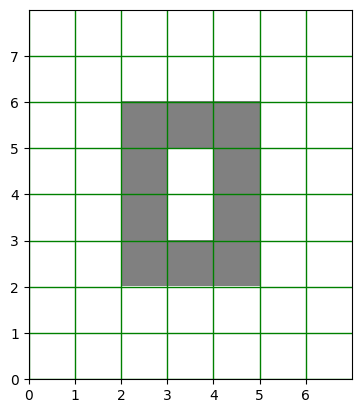

In [2]:
# mat1 = cvlib.load_image('resources/data/cameraman.tif')
# mat1 = cvlib.convert_rgb2gray(mat1)
# mat1 = cvlib.binarize(mat1, 128)

# O-shape: Closing is obvious in this.
mat1 = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# 7-shape: This leaves filling in the closed corner.
# mat1 = np.array([
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 1, 1, 1, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0]
# ])

# Cross
# se = np.array([
#     [0, 1, 0],
#     [1, 1, 1],
#     [0, 1, 0],
# ])

# Rect
# se = np.array([
#     [1, 1, 1],
#     [1, 1, 1],
#     [1, 1, 1],
# ])
se = np.array([
    [1, 1],
    [0, 1],
    [0, 1],
])

# Need to convert them first for cv operations.
mat1 = mat1.astype('uint8')
se = se.astype('uint8')

# print(mat1)
nb.display_color_grids(mat1)

## Dilation and Erosion with Cross SE
Performing dilation and followed by erosion doesn't restore the source image. It <u>leaves fillings in closed corners</u>.
<p><b>This is true for close operation that dilates then erodes leaving fillings for closing.</b>

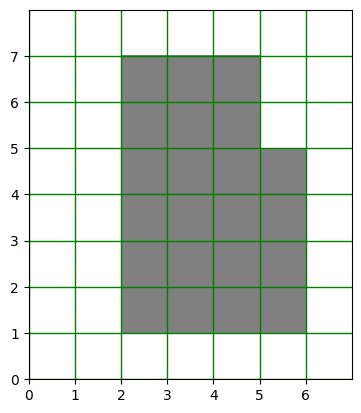

In [3]:
dilated = cv2.dilate(mat1, se, iterations=1)
# print(dilated)
# type(kernel)
nb.display_color_grids(dilated)

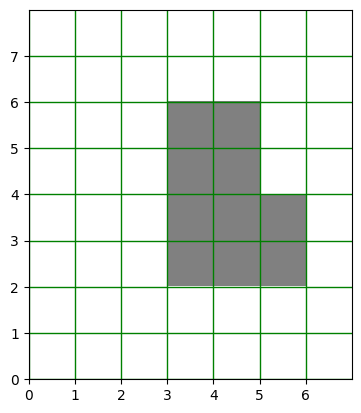

In [4]:
eroded = cv2.erode(dilated, se, iterations=1)
# print(eroded)
nb.display_color_grids(eroded)

In [5]:
# Leaves filling(s) on the closed corners.
np.array_equal(mat1, eroded)

False

## Erosion on Dilated with Cross SE
<b>Important:</b> Performing dilation to eroded image restores the original dilation!

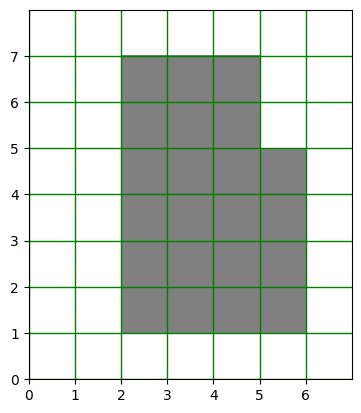

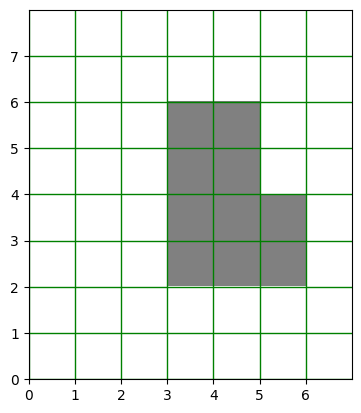

In [6]:
# print(dilated)
nb.display_color_grids(dilated)
nb.display_color_grids(eroded)

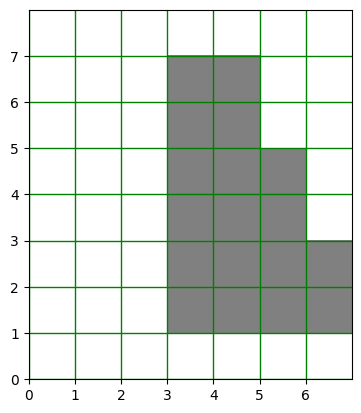

In [7]:
dilated2 = cv2.dilate(eroded, se, iterations=1)
nb.display_color_grids(dilated2)
# print(dilated2)

In [8]:
# Dilated and eroded is the same.
np.array_equal(dilated, dilated2)

False

## Experiment the theory with a gray image

In [9]:
image = cvlib.load_image('../resources/data/cameraman.tif')
image = cvlib.convert_rgb2gray(image)
image.shape

(512, 512)

In [10]:
image = cvlib.binarize(image, 128)
unique = np.unique(image)
print(unique)

[  0 255]


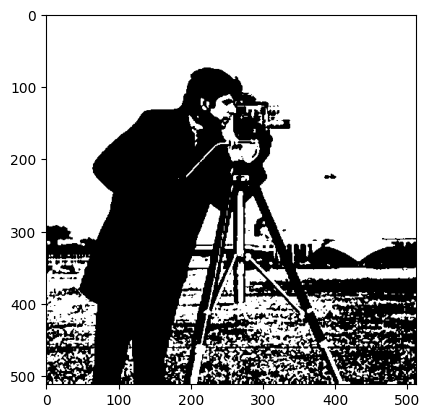

In [11]:
plt.imshow(image, cmap='gray')

## Erosion on dilated with cross SE (on image)

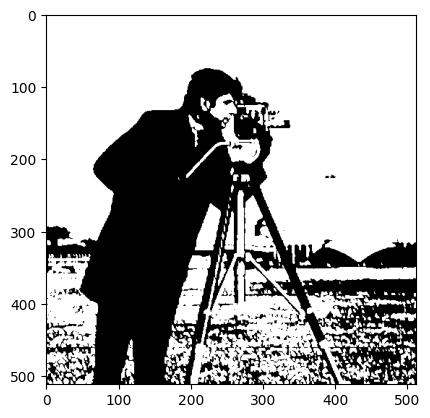

In [12]:
# Dilate first.
dilated_image = cv2.dilate(image, se, iterations=1)
plt.imshow(dilated_image, cmap='gray')

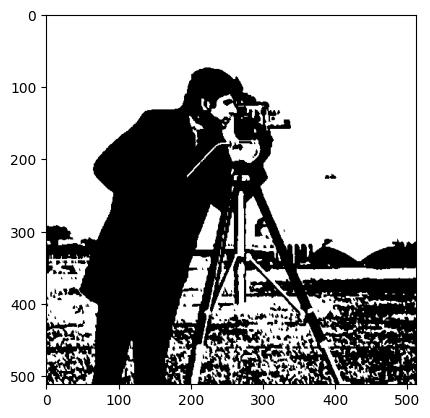

In [13]:
# Erode the dilated image.
eroded_image = cv2.erode(dilated_image, se, iterations=1)
plt.imshow(eroded_image, cmap='gray')

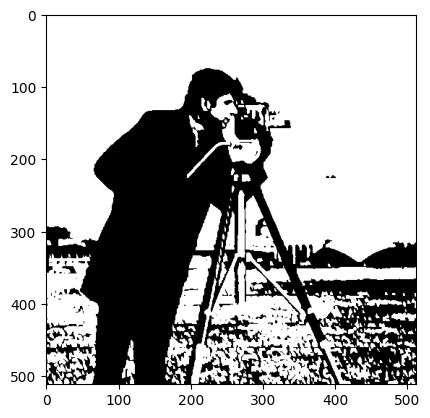

In [14]:
# Dilate the eroded image again.
dilated_image2 = cv2.dilate(eroded_image, se, iterations=1)
plt.imshow(dilated_image2, cmap='gray')

In [15]:
np.array_equal(dilated_image, dilated_image2)

False

## Experimenting the closing results
Will perform closing (dilation + erosion) and dilation on the result. Then compare the result with the original dilation and erosion (dilated).
<p><b>Import</b> The result is the same!

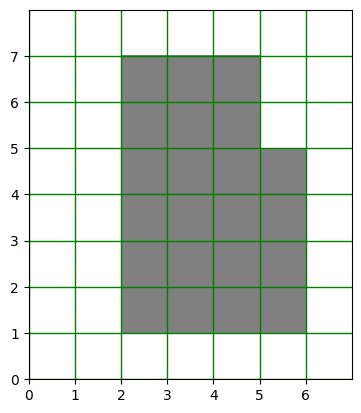

In [16]:
nb.display_color_grids(dilated)

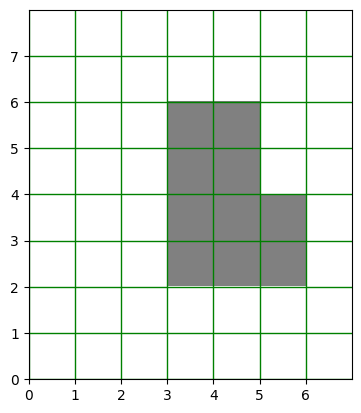

In [17]:
closed = cv2.morphologyEx(mat1, cv2.MORPH_CLOSE, se)
nb.display_color_grids(closed)

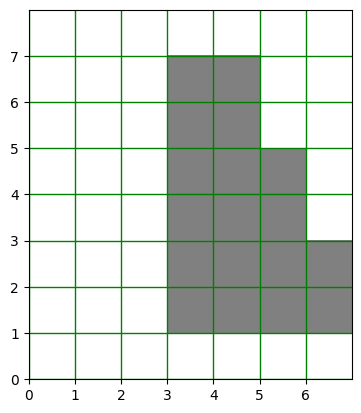

In [18]:
dilated3 = cv2.dilate(closed, se, iterations=1)
nb.display_color_grids(dilated3)

In [19]:
np.array_equal(dilated, dilated3)

False